In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_numbat_dataframe(data_dir, year, weekdays, sheet_name):
    df_numbat = pd.DataFrame()
    for weekday in weekdays:
        df_day = pd.read_excel(os.path.join(data_dir, f'NUMBAT {2023}', f'NBT{str(year)[-2:]}{weekday}_outputs.xlsx'), sheet_name=sheet_name,skiprows=2, header=0)
        df_day['weekday'] = weekday
        df_numbat = pd.concat((df_numbat, df_day))
    
    rename_dict = {
        'Early     ' : 'Early',
        'AM Peak   ' : 'AM Peak',
        'Midday    ' : 'Midday',
        'PM Peak   ' : 'PM Peak',
        'Evening   ' : 'Evening',
        'Late      ' : 'Late'
    }
    df_numbat = df_numbat.rename(columns=rename_dict)
    return df_numbat


In [5]:
data_dir = 'data/london/'
weekdays = ['MON', 'TWT', 'FRI', 'SAT', 'SUN']

## NUMBAT

### `Link_Loads` sheet

In [6]:
df_numbat_link_loads = create_numbat_dataframe(data_dir, 2023, weekdays, 'Link_Loads')
df_numbat_link_loads

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,...,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500,weekday
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,MON
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,MON
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,MON
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,MON
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,MON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,...,0.0,0.0,0.0,0.0,0.0,0.050722,0.052232,0.052232,0.052232,SUN
1202,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,...,0.0,0.0,0.0,0.0,0.0,0.050722,0.051613,0.051613,0.051613,SUN
1203,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,...,0.0,0.0,0.0,0.0,0.0,0.000211,0.000808,0.000808,0.000808,SUN
1204,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,SUN


In [7]:
len(df_numbat_link_loads['From NLC'].unique())

471

In [18]:
day_col = ['Total', 'Early', 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Late']
df_numbat_link_loads[day_col].describe()

,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
count,6030.000000,6030.000000,6030.000000,6030.000000,6030.000000,6030.000000,6030.000000
mean,27003.871572,968.537117,4982.870036,8513.299841,7007.442012,3586.935943,1944.786624
std,28135.359176,1455.254704,6670.224269,9093.276276,7718.988511,4144.269204,2830.460569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7362.045608,106.710678,929.377019,2222.093608,1712.576788,790.769791,264.507702
50%,16324.909188,419.264715,2582.770824,5097.774102,4163.270624,1996.369888,841.114641
75%,39338.276104,1180.346696,5944.728557,12037.717721,9699.499266,4922.791650,2330.499326
max,165072.518004,13457.894268,62139.369780,67544.344248,57310.194999,28505.324982,19513.666100


In [19]:
df_numbat_link_loads[df_numbat_link_loads['Total'] == 0.][['Line', 'From Station', 'To Station']]

,Line,From Station,To Station
819,London Trams,Wimbledon Trams,Dundonald Road
820,London Trams,Dundonald Road,Merton Park
821,London Trams,Merton Park,Morden Road
822,London Trams,Morden Road,Phipps Bridge
823,London Trams,Phipps Bridge,Belgrave Walk
...,...,...,...
889,London Trams,Dundonald Road,Wimbledon Trams
970,Northern,Nine Elms,Kennington (Bank)
1058,Northern,Kennington (Bank),Nine Elms
1204,Waterloo & City,Waterloo LU,Bank and Monument


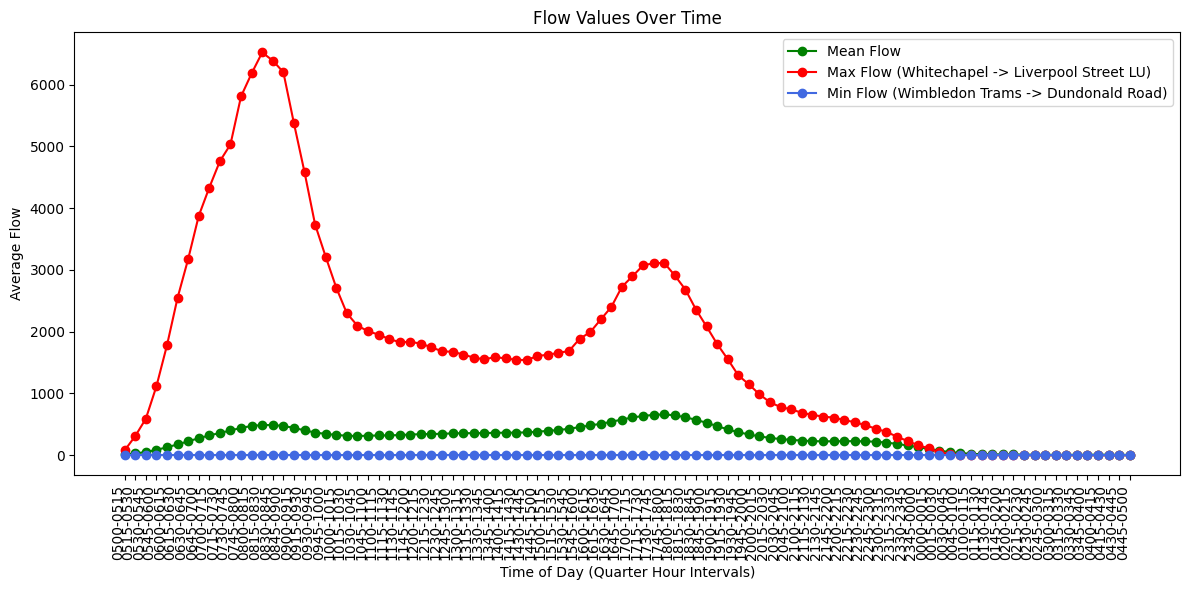

In [20]:
import matplotlib.pyplot as plt

# Assuming 'df_numbat_link_loads' is already loaded as in the previous code

# Select columns representing 15-minute intervals (adjust these if needed)
flow_columns = [col for col in df_numbat_link_loads.columns if '-' in col]

# Create a time series for plotting

df_max_link = df_numbat_link_loads[df_numbat_link_loads['Total'] == df_numbat_link_loads['Total'].max()]
df_min_link = df_numbat_link_loads[df_numbat_link_loads['Total'] == df_numbat_link_loads['Total'].min()]

time_series = []
mean_flow_values = []
max_flow_values = []
min_flow_values = []

for col in flow_columns:
    time_series.append(col)  # Using column name as the time label
    mean_flow_values.append(df_numbat_link_loads[col].mean()) # or sum(), depending on your requirement
    max_flow_values.append(df_max_link[col].values[0])
    min_flow_values.append(df_min_link[col].values[0])

# Plotting the flow values
plt.figure(figsize=(12, 6))
plt.plot(time_series, mean_flow_values, marker='o', color='green', label='Mean Flow')
plt.plot(time_series, max_flow_values, marker='o', color='red', label=f"Max Flow ({df_max_link['From Station'].values[0]} -> {df_max_link['To Station'].values[0]})")
plt.plot(time_series, min_flow_values, marker='o', color='royalblue', label=f"Min Flow ({df_min_link['From Station'].values[0]} -> {df_min_link['To Station'].values[0]})")
plt.legend()
plt.xlabel("Time of Day (Quarter Hour Intervals)")
plt.ylabel("Average Flow") # Or "Total Flow" depending on your aggregation method
plt.title("Flow Values Over Time")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


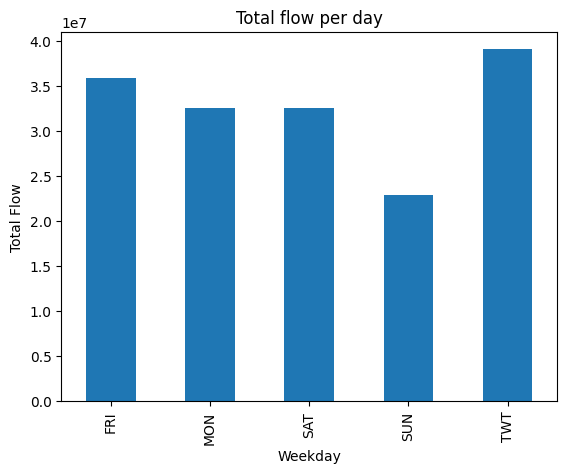

In [30]:
df_by_day = df_numbat_link_loads.groupby('weekday')['Total'].aggregate('sum')
df_by_day.plot(kind='bar')
plt.xlabel("Weekday")
plt.ylabel("Total Flow") # Or "Total Flow" depending on your aggregation method
plt.title("Total flow per day")
plt.show()

### `Station_Flows` sheet

In [24]:
df_numbat_station_flows = create_numbat_dataframe(data_dir, 2023, weekdays, 'Station_Flows')
df_numbat_station_flows

,ID,Complex NLC,From NLC,From ASC,From Station,From Node,To NLC,To ASC,To Station,To Node,...,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500,weekday
0,620801>620816,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // EB,...,0.0,0.0,0.0,0.0,0.0,0.0,4.622020,4.622020,4.622020,MON
1,620801>620817,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // WB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,MON
2,620801>620830,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // EB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,MON
3,620801>620831,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // WB,...,0.0,0.0,0.0,0.0,0.0,0.0,2.692874,2.692874,2.692874,MON
4,620816>620801,500,500,ACTu,Acton Town,District // EB,500,ACTu,Acton Town,EntEx,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,MON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,30788>30714,524,524,BDSu,Bond Street,Bond Street // Elizabeth Line // WB,524,BDSu,Bond Street,Bond Street // Central // EB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,SUN
5219,30788>30715,524,524,BDSu,Bond Street,Bond Street // Elizabeth Line // WB,524,BDSu,Bond Street,Bond Street // Central // WB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,SUN
5220,30788>30722,524,524,BDSu,Bond Street,Bond Street // Elizabeth Line // WB,524,BDSu,Bond Street,Bond Street // Jubilee // NB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,SUN
5221,30788>30723,524,524,BDSu,Bond Street,Bond Street // Elizabeth Line // WB,524,BDSu,Bond Street,Bond Street // Jubilee // SB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,SUN


## Network Demand

In [ ]:
import holidays

def add_calendar(df: pd.DataFrame, datetime_col : str):
    # Basic calendar variables
    df[datetime_col] = df[datetime_col].dt.floor("D")
    df['month'] = df[datetime_col].dt.month
    df['weekday'] = df[datetime_col].dt.weekday

    # Is_gap_day
    list_gap_days = list(holidays.GB(years=[2023,2024], subdiv='ENG').keys())
    df['is_gap_day'] = df[datetime_col].isin(list_gap_days).astype(int)

    # Is_open_day
    df['is_open_day'] = (df['weekday'].le(4) & df['is_gap_day'].eq(0)).astype(int)

    return df

In [ ]:
df_station_footfall = pd.read_csv('Network Demand/StationFootfall_2023_2024 .csv')
df_station_footfall['TravelDate'] = pd.to_datetime(df_station_footfall['TravelDate'], format='%Y%m%d')
df_station_footfall = add_calendar(df_station_footfall, 'TravelDate')
df_station_footfall.drop(columns=['DayOfWeek'], inplace=True)

<ipython-input-70-ce5c88943859>:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_gap_day'] = df[datetime_col].isin(list_gap_days).astype(int)


In [ ]:
df_station_footfall.head()

,TravelDate,Station,EntryTapCount,ExitTapCount,month,weekday,is_gap_day,is_open_day
0,2023-01-01,Abbey Road DLR,360,322,1,6,1,0
1,2023-01-01,Abbey Wood,4375,4382,1,6,1,0
2,2023-01-01,Acton Central,779,709,1,6,1,0
3,2023-01-01,Acton Main Line,1087,967,1,6,1,0
4,2023-01-01,Acton Town,2608,3059,1,6,1,0


In [ ]:
print(df_station_footfall[df_station_footfall['is_gap_day'] == 1]['TravelDate'].unique())
list(holidays.GB(years=[2023,2024], subdiv='ENG').keys())

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-04-07 00:00:00',
 '2023-04-10 00:00:00', '2023-05-01 00:00:00', '2023-05-08 00:00:00',
 '2023-05-29 00:00:00', '2023-08-28 00:00:00', '2023-12-25 00:00:00',
 '2023-12-26 00:00:00', '2024-01-01 00:00:00', '2024-03-29 00:00:00',
 '2024-04-01 00:00:00', '2024-05-06 00:00:00', '2024-05-27 00:00:00',
 '2024-08-26 00:00:00', '2024-12-25 00:00:00', '2024-12-26 00:00:00']
Length: 18, dtype: datetime64[ns]


[datetime.date(2024, 3, 29),
 datetime.date(2024, 5, 6),
 datetime.date(2024, 5, 27),
 datetime.date(2024, 1, 1),
 datetime.date(2024, 12, 25),
 datetime.date(2024, 12, 26),
 datetime.date(2024, 4, 1),
 datetime.date(2024, 8, 26),
 datetime.date(2023, 4, 7),
 datetime.date(2023, 5, 1),
 datetime.date(2023, 5, 29),
 datetime.date(2023, 5, 8),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 1, 2),
 datetime.date(2023, 12, 25),
 datetime.date(2023, 12, 26),
 datetime.date(2023, 4, 10),
 datetime.date(2023, 8, 28)]

In [ ]:
df_station_footfall[['EntryTapCount', 'ExitTapCount']].describe()

,EntryTapCount,ExitTapCount
count,312190.000000,312190.000000
mean,8860.261174,8822.720757
std,13638.172235,13884.950425
min,0.000000,0.000000
25%,2283.000000,2164.000000
50%,4576.000000,4428.000000
75%,9070.750000,8973.000000
max,147028.000000,142948.000000


4.852459016393443 4.2631578947368425


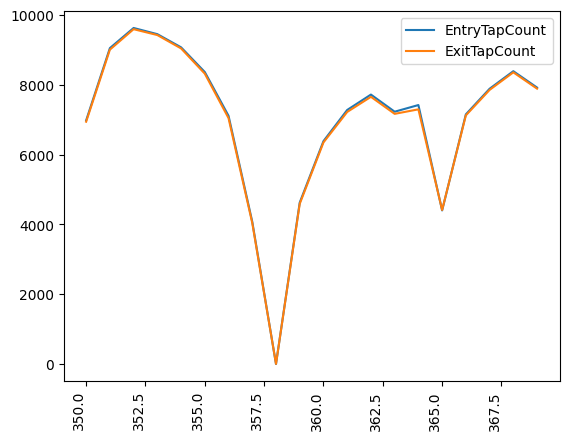

In [ ]:
df_plot = df_station_footfall.groupby('TravelDate')[['EntryTapCount', 'ExitTapCount']].aggregate('mean').reset_index(drop=True)
df_plot[350:370].plot(y=['EntryTapCount', 'ExitTapCount'])
print(df_plot['EntryTapCount'].min(), df_plot['ExitTapCount'].min())
plt.xticks(rotation=90, ha='right')
plt.show()

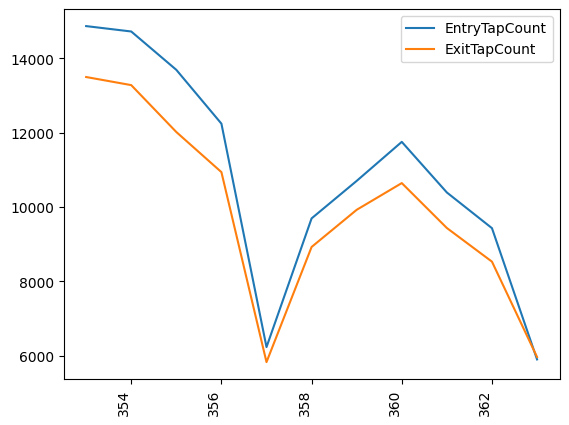

In [ ]:
df_plot = df_station_footfall[df_station_footfall['Station'] == 'Abbey Wood'].reset_index(drop=True)
df_plot['date_weekday'] = df_plot['date'].dt.strftime('%Y-%m-%d (%a)')
df_plot[df_plot['date'].between('2023-12-20', '2024-01-01')].plot(y=['EntryTapCount', 'ExitTapCount'])
plt.xticks(rotation=90, ha='right')
plt.show()